In [3]:
pip install wheel

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 6.8 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

In [79]:
Trace_0 = pd.read_csv('attacktraces/attacktrace_0.csv')
Trace_1 = pd.read_csv('attacktraces/attacktrace_1.csv')
Trace_2 = pd.read_csv('attacktraces/attacktrace_2.csv')
Trace_3 = pd.read_csv('attacktraces/attacktrace_3.csv')
Trace_4 = pd.read_csv('attacktraces/attacktrace_4.csv')
Trace_5 = pd.read_csv('attacktraces/attacktrace_5.csv')
Trace_6 = pd.read_csv('attacktraces/attacktrace_6.csv')
Trace_7 = pd.read_csv('attacktraces/attacktrace_7.csv')
Trace_8 = pd.read_csv('attacktraces/attacktrace_8.csv')
Trace_9 = pd.read_csv('attacktraces/attacktrace_9.csv')

In [91]:
import matplotlib.pyplot as plt
import os
import numpy as np 

samples = 4999
N = 29
trace_0 = np.zeros((N, samples))
trace_9 = np.zeros((N, samples))

for i in range(29):
    trace_0[i] = Trace_0.iloc[:, i]

In [92]:
trace_9[0]

array([-0.09960938, -0.08203125, -0.03027344, ..., -0.27050781,
       -0.171875  , -0.09179688])

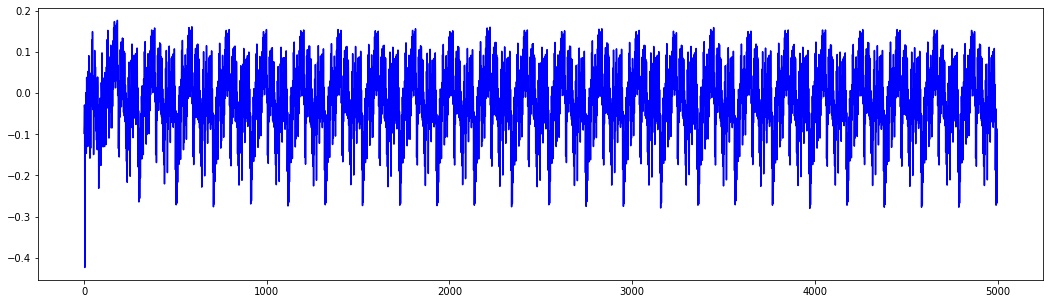

In [104]:
# Plot the traces

plt.figsize=(6,7)
plt.gcf().set_size_inches(18, 5) 
plt.plot(trace_0[10], color = 'blue')  
plt.show()


## Reference traces

In [196]:
Ref_Trace_00 = pd.read_csv('reftraces/reftrace_0 (1).csv')
Ref_Trace_01 = pd.read_csv('reftraces/reftrace_0.csv')

Ref_Trace_150 = pd.read_csv('reftraces/reftrace_15.csv')
Ref_Trace_151 = pd.read_csv('reftraces/reftrace_15 (1).csv')

Ref_Trace_300 = pd.read_csv('reftraces/reftrace_30.csv') 
Ref_Trace_301 = pd.read_csv('reftraces/reftrace_30 (1).csv')

In [203]:
Training_traces = np.zeros((29*6, samples))
Training_labels = np.zeros((29*6))


ref_trace_0 = np.zeros((2*N, samples))
ref_trace_15 = np.zeros((2*N, samples))
ref_trace_30 = np.zeros((2*N, samples))

#Build the ref traces
for i in range(29):
    ref_trace_0[i] = Ref_Trace_00.iloc[:, i] + Ref_Trace_01.iloc[:, i]
    ref_trace_15[i] = Ref_Trace_150.iloc[:, i] + Ref_Trace_151.iloc[:, i]
    ref_trace_30[i] = Ref_Trace_300.iloc[:, i] + Ref_Trace_301.iloc[:, i]
    
#Prepare the training data 
for i in range(29):
    Training_traces[i] = Ref_Trace_00.iloc[:, i] + Ref_Trace_01.iloc[:, i]
    Training_labels[i] = 0
    
for i in range(29):
    Training_traces[i+58] = Ref_Trace_150.iloc[:, i] + Ref_Trace_151.iloc[:, i]
    Training_labels[i+58] = 15
    
for i in range(29):
    Training_traces[i+116] = Ref_Trace_300.iloc[:, i] + Ref_Trace_301.iloc[:, i]
    Training_labels[i+116] = 30

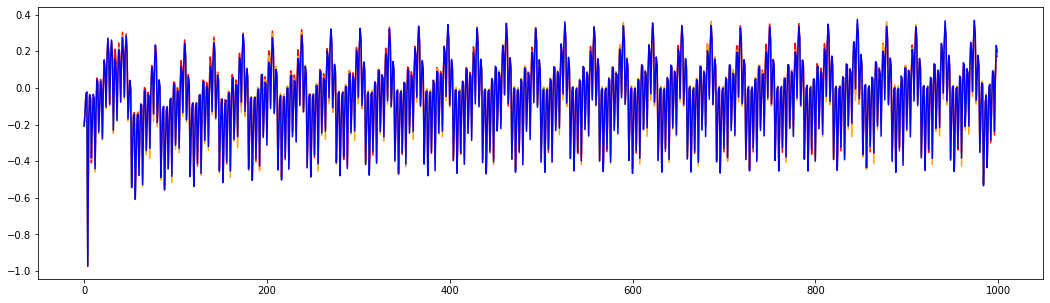

In [205]:
# Plot the traces

plt.figsize=(6,7)
plt.gcf().set_size_inches(18, 5) 
#ref trace 0 , column 10, first 1000 samples 
plt.plot(ref_trace_0[10][0:1000], color = 'red')  
plt.plot(ref_trace_30[20][0:1000], color = 'orange')  
plt.plot(ref_trace_15[0][0:1000], color = 'blue') 
plt.show()


## ML side-channel analysis

In [206]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Training_traces, Training_labels, test_size=0.2)

from sklearn.neural_network import MLPClassifier 

Dec_clf = MLPClassifier(
    random_state=42,
    solver='adam', 
    learning_rate='adaptive',
    max_iter=2000,
    hidden_layer_sizes=[300],
    batch_size=50,
    early_stopping=True,
    n_iter_no_change=100,
    verbose=False, 
)
Dec_clf.fit(X_train, y_train)
 


MLPClassifier(batch_size=50, early_stopping=True, hidden_layer_sizes=[300],
              learning_rate='adaptive', max_iter=2000, n_iter_no_change=100,
              random_state=42)

In [207]:
predictions =np.zeros(len(y_test))
predictions = Dec_clf.predict(X_test)
success = 0

for i in range(len(y_test)):
    if predictions[i] == y_test[i]: 
        success = success +1
    else:
        print(predictions[i], y_test[i])
 
         
print((success /len(y_test))*100)

15.0 0.0
15.0 0.0
15.0 30.0
15.0 30.0
15.0 30.0
15.0 30.0
82.85714285714286


In [208]:
y_test

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,
       15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,
       30., 15., 30., 15.,  0.,  0., 30.,  0.,  0.])